Processing category: People & Blogs


03:29:12 - cmdstanpy - INFO - Chain [1] start processing


Best ARIMA order: (2, 1, 0) with RMSE: 0.06


03:29:12 - cmdstanpy - INFO - Chain [1] done processing


Processing category: Music


03:29:15 - cmdstanpy - INFO - Chain [1] start processing
03:29:15 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (0, 1, 0) with RMSE: 0.96
Processing category: Pets & Animals


03:29:20 - cmdstanpy - INFO - Chain [1] start processing


Best ARIMA order: (0, 0, 0) with RMSE: 0.02


03:29:20 - cmdstanpy - INFO - Chain [1] done processing


Processing category: Gaming


03:29:26 - cmdstanpy - INFO - Chain [1] start processing


Best ARIMA order: (0, 1, 0) with RMSE: 0.09


03:29:26 - cmdstanpy - INFO - Chain [1] done processing


Processing category: Howto & Style


03:29:33 - cmdstanpy - INFO - Chain [1] start processing


Best ARIMA order: (1, 1, 0) with RMSE: 0.05


03:29:34 - cmdstanpy - INFO - Chain [1] done processing


Processing category: Entertainment


03:29:40 - cmdstanpy - INFO - Chain [1] start processing


Best ARIMA order: (1, 1, 1) with RMSE: 0.14


03:29:40 - cmdstanpy - INFO - Chain [1] done processing


Processing category: News & Politics


03:29:46 - cmdstanpy - INFO - Chain [1] start processing


Best ARIMA order: (2, 1, 1) with RMSE: 0.06


03:29:46 - cmdstanpy - INFO - Chain [1] done processing


Processing category: Comedy


03:29:53 - cmdstanpy - INFO - Chain [1] start processing
03:29:53 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (2, 1, 1) with RMSE: 0.04
Processing category: Film & Animation
Best ARIMA order: (0, 1, 0) with RMSE: 0.20


03:30:00 - cmdstanpy - INFO - Chain [1] start processing
03:30:00 - cmdstanpy - INFO - Chain [1] done processing


Processing category: Science & Technology


03:30:06 - cmdstanpy - INFO - Chain [1] start processing


Best ARIMA order: (2, 1, 1) with RMSE: 0.13


03:30:07 - cmdstanpy - INFO - Chain [1] done processing


Processing category: Sports
Best ARIMA order: (1, 1, 1) with RMSE: 0.03


03:30:13 - cmdstanpy - INFO - Chain [1] start processing
03:30:14 - cmdstanpy - INFO - Chain [1] done processing


Processing category: Autos & Vehicles


03:30:22 - cmdstanpy - INFO - Chain [1] start processing
03:30:22 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (1, 1, 2) with RMSE: 0.00
Processing category: Education


03:30:26 - cmdstanpy - INFO - Chain [1] start processing


Best ARIMA order: (1, 0, 2) with RMSE: 0.01


03:30:27 - cmdstanpy - INFO - Chain [1] done processing


Processing category: Travel & Events


03:30:32 - cmdstanpy - INFO - Chain [1] start processing


Best ARIMA order: (0, 1, 2) with RMSE: 0.00


03:30:33 - cmdstanpy - INFO - Chain [1] done processing


Processing category: Nonprofits & Activism


03:30:38 - cmdstanpy - INFO - Chain [1] start processing
03:30:38 - cmdstanpy - INFO - Chain [1] done processing


Best ARIMA order: (1, 1, 2) with RMSE: 0.00
Processing category: Shows


03:30:43 - cmdstanpy - INFO - Chain [1] start processing


Best ARIMA order: (0, 0, 1) with RMSE: 0.00


03:30:44 - cmdstanpy - INFO - Chain [1] done processing


✅ Models trained and saved successfully!


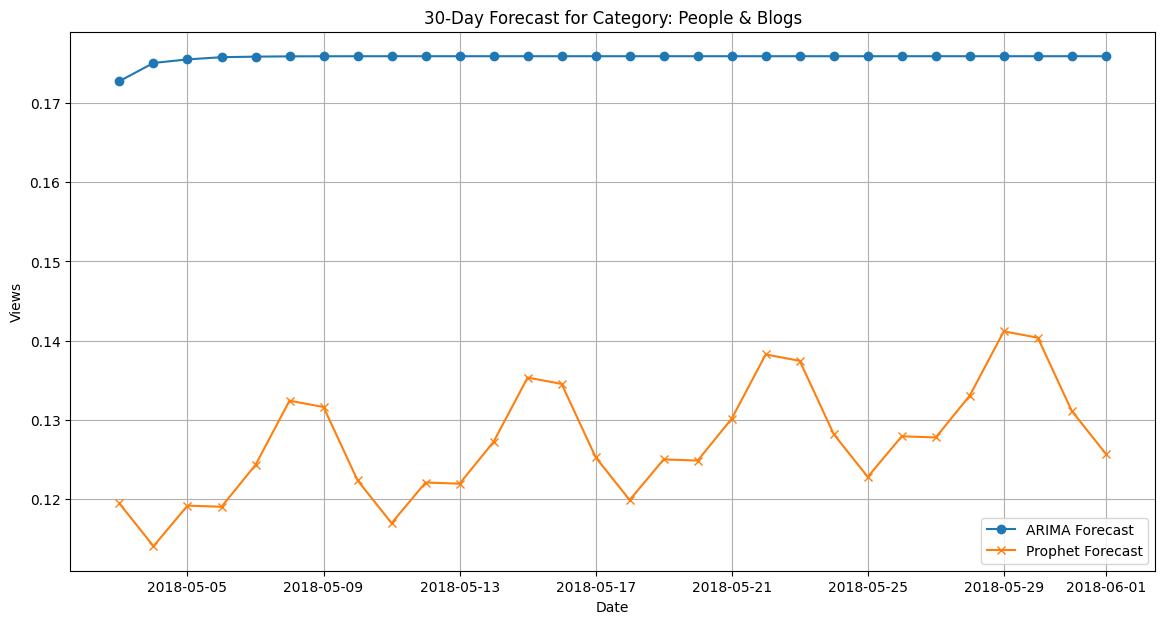

In [8]:
# timeseries_forecasting.ipynb

# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# 2. Load Data
df = pd.read_csv('../data/processed_data.csv')

# 3. Map category_id to readable category names
category_mapping = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
    10: 'Music',
    15: 'Pets & Animals',
    17: 'Sports',
    18: 'Short Movies',
    19: 'Travel & Events',
    20: 'Gaming',
    21: 'Videoblogging',
    22: 'People & Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News & Politics',
    26: 'Howto & Style',
    27: 'Education',
    28: 'Science & Technology',
    29: 'Nonprofits & Activism',
    30: 'Movies',
    31: 'Anime/Animation',
    32: 'Action/Adventure',
    33: 'Classics',
    34: 'Comedy',
    35: 'Documentary',
    36: 'Drama',
    37: 'Family',
    38: 'Foreign',
    39: 'Horror',
    40: 'Sci-Fi/Fantasy',
    41: 'Thriller',
    42: 'Shorts',
    43: 'Shows',
    44: 'Trailers'
}
df['category'] = df['category_id'].map(category_mapping)

# 4. Fix date column
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df = df.sort_values('trending_date')
df.set_index('trending_date', inplace=True)

# 5. Select features for time series forecasting
categories = df['category'].dropna().unique()  # Drop missing category IDs if any

# 6. Define a function to split train-test sets
def train_test_split_time_series(series, test_size=0.2):
    split_idx = int(len(series) * (1 - test_size))
    train, test = series[:split_idx], series[split_idx:]
    return train, test

# 7. Forecasting using ARIMA and Prophet
final_forecasts = {}

for cat in categories:
    print(f"Processing category: {cat}")
    
    # Subset data for the category
    cat_df = df[df['category'] == cat].resample('D').sum()  # Daily aggregation
    series = cat_df['views'].fillna(0)

    # Train-test split
    train, test = train_test_split_time_series(series)

    # ARIMA modeling
    best_rmse = np.inf
    best_order = None
    best_model = None

    # Simple Grid Search for (p,d,q)
    for p in range(0, 3):
        for d in range(0, 2):
            for q in range(0, 3):
                try:
                    model = ARIMA(train, order=(p, d, q)).fit()
                    pred = model.forecast(steps=len(test))
                    rmse = np.sqrt(mean_squared_error(test, pred))
                    if rmse < best_rmse:
                        best_rmse = rmse
                        best_order = (p, d, q)
                        best_model = model
                except:
                    continue

    print(f"Best ARIMA order: {best_order} with RMSE: {best_rmse:.2f}")

    # Forecast 30 days ahead
    arima_forecast = best_model.forecast(steps=30)

    # Prophet modeling
    prophet_df = train.reset_index()
    prophet_df = prophet_df.rename(columns={'trending_date': 'ds', 'views': 'y'})
    
    prophet_model = Prophet(daily_seasonality=True)
    prophet_model.fit(prophet_df)

    future = prophet_model.make_future_dataframe(periods=30)
    forecast = prophet_model.predict(future)

    prophet_forecast = forecast[['ds', 'yhat']].set_index('ds').iloc[-30:]['yhat']

    # Store both models and forecasts
    final_forecasts[cat] = {
        'arima_forecast': arima_forecast,
        'prophet_forecast': prophet_forecast,
        'arima_model': best_model,
        'prophet_model': prophet_model
    }

# 8. Save the model forecasts
with open('../models/trend_forecast_model.pkl', 'wb') as f:
    pickle.dump(final_forecasts, f)

print("✅ Models trained and saved successfully!")

# 9. (Optional) Plotting a sample category
sample_cat = categories[0]
arima_pred = final_forecasts[sample_cat]['arima_forecast']
prophet_pred = final_forecasts[sample_cat]['prophet_forecast']

plt.figure(figsize=(14,7))
plt.plot(arima_pred.index, arima_pred.values, label='ARIMA Forecast', marker='o')
plt.plot(prophet_pred.index, prophet_pred.values, label='Prophet Forecast', marker='x')
plt.title(f"30-Day Forecast for Category: {sample_cat}")
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend()
plt.grid()
plt.show()


In [2]:
print(df.columns)


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'publish_day', 'publish_month', 'publish_hour',
       'category_id_encoded'],
      dtype='object')
